### Mode Evaluator Example 

In [1]:
from models.regex import RegexModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison

# Load the regex model and the dataloader 
regex_m = RegexModel()
dataloader = AnnotationDataLoader()

regex_m.model_title = "Regex"
regex_m.model_info = "a"

# warp it model evaluator
## Evaluate model
# regex_m_wrapper = ModelEvalWrapper(regex_m, "Regex", "The baseline regex classifer")

In [ ]:
# regex_m_wrapper.predict(["asd", "asdadad"])

[2, 2]

In [3]:
import pandas as pd
t1 = dataloader.get_train()
t2 = dataloader.get_validation()
t3 = dataloader.get_test()

all = pd.concat([t1, t2, t3])

In [4]:
all

,protein_annotation,label
0,"Activator 1 36 kDa, putative",0
1,ARAD1C36740p,0
2,Abasic site processing protein YMR114C,2
3,Amino acid dehydrogenase,2
4,"Transcription regulator HTH, LysR",2
...,...,...
495,Anaerobic ribonucleoside-triphosphate reductas...,2
496,Beta-aspartyl asparaginyl family,2
497,Murein hydrolase activator NlpD,2
498,Outer membrane lipoprotein pcp,2



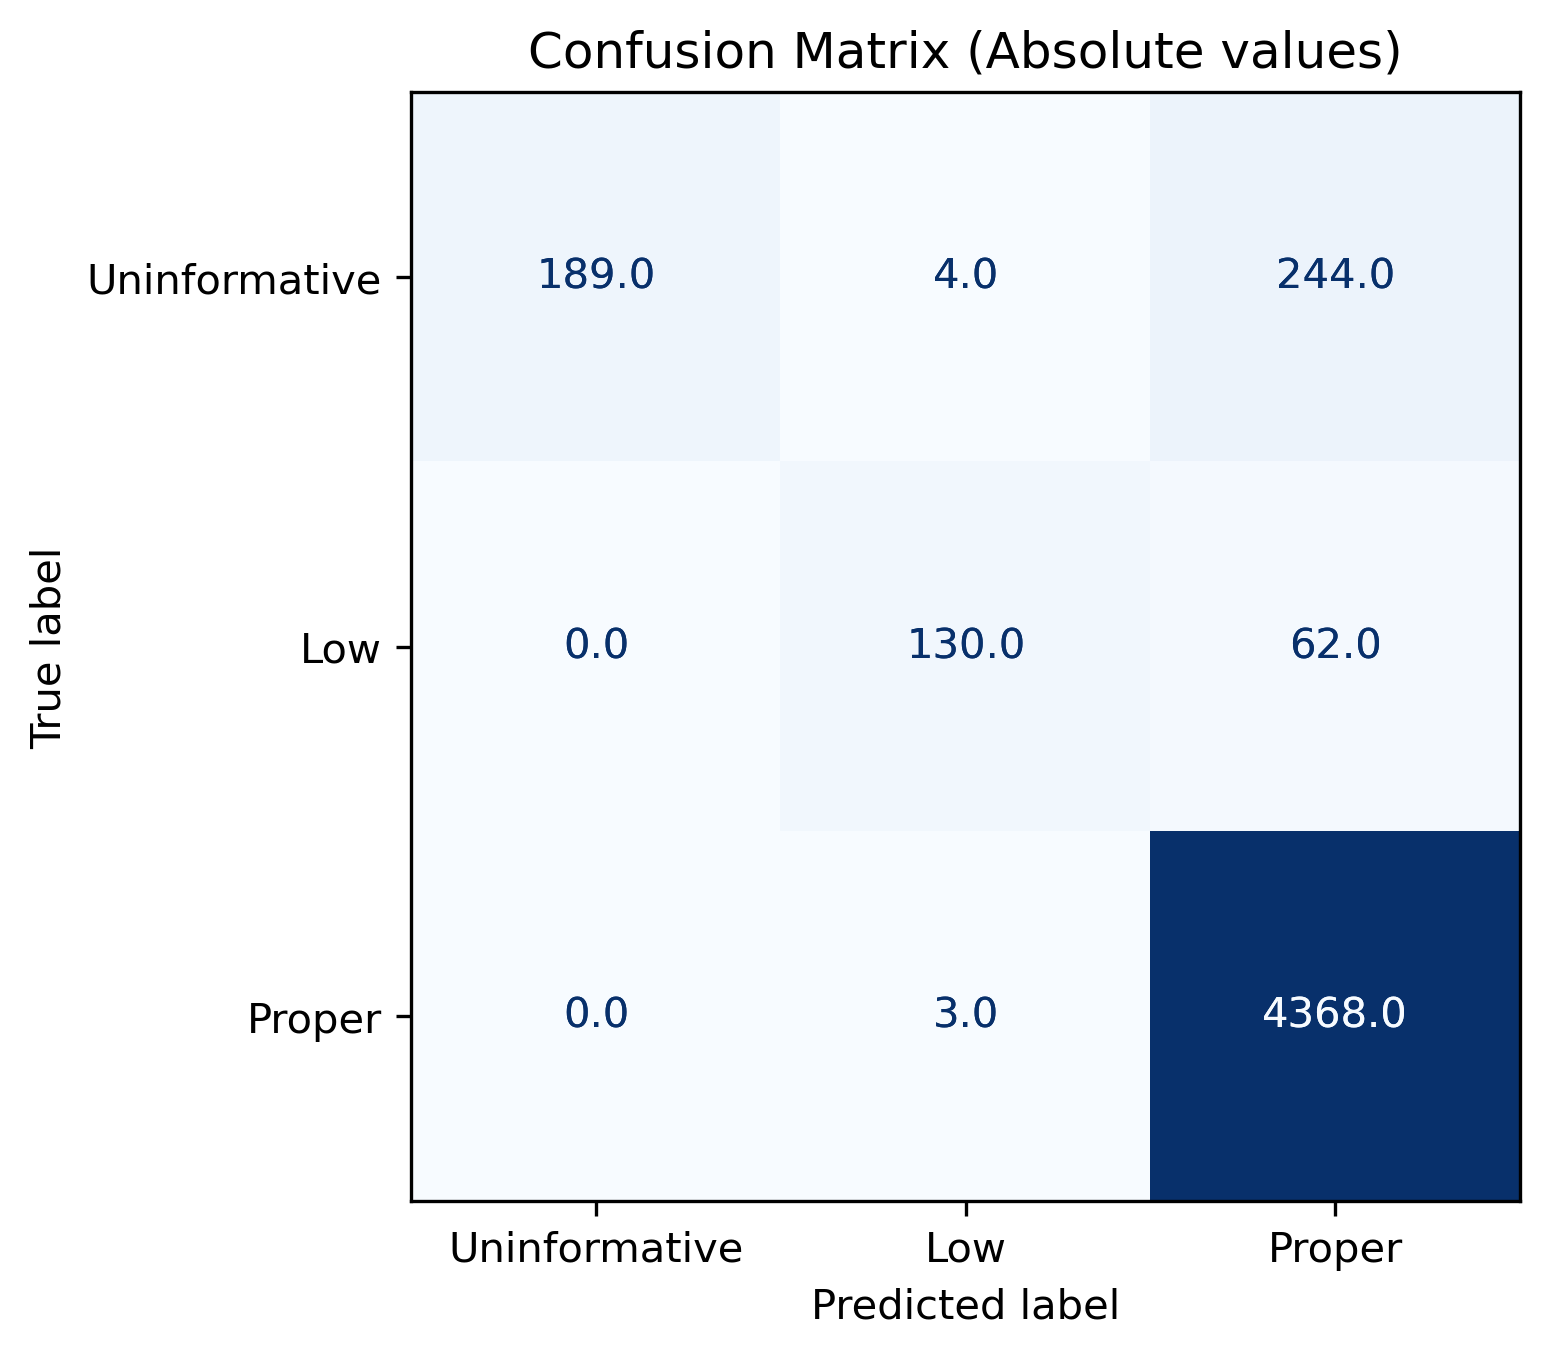
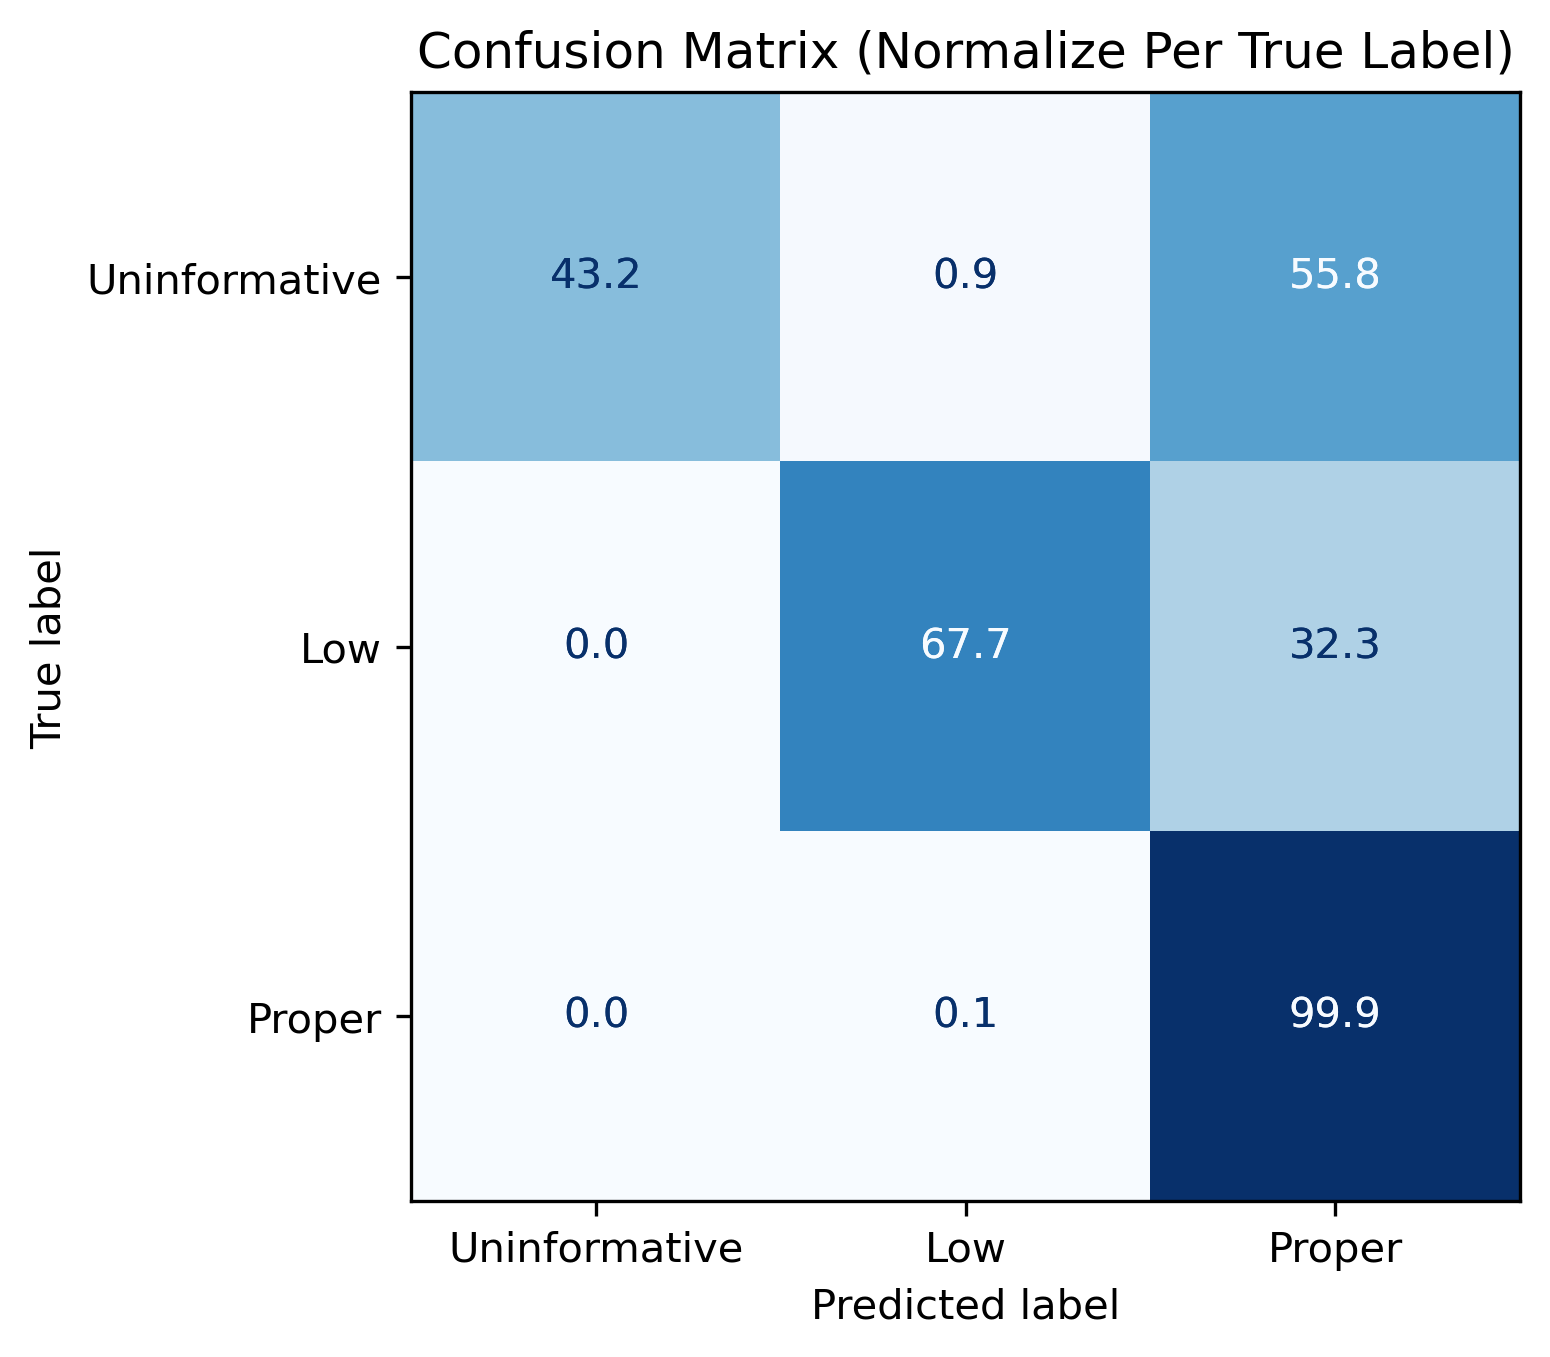

In [90]:
# regex model requrie no traning, so we can just predict on the eval set
# evaluator = ModelEvaluator(regex_m_wrapper, dataloader.get_train())
evaluator = ModelEvaluator(regex_m, all)

regex_report = evaluator.generate_report()
regex_report.show_report()

,protein_annotation,true_label,predicted_label
0,"Activator 1 36 kDa, putative",0,2
1,ARAD1C36740p,0,2
9,GD15429,0,2
12,"Uncharacterized conserved protein UCP015417, vWA",0,2
19,Poly,0,2
...,...,...,...
414,Phage-related J or K,0,2
435,BQ5605_C018g08736 protein,0,2
436,Uncharacterized gene 7.7 protein (Modular prot...,0,2
465,Leucine rich repeat 5,1,2


In [7]:
# # Save report to disk
# regex_report.save_to_file("report_regex.rep")

regex_report.eval_df != regex_report.eval_df 

,protein_annotation,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
495,False,False
496,False,False
497,False,False
498,False,False


In [2]:
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison

reg_report = ModelReport.load_report("report_regex.rep")
emb_report = ModelReport.load_report("embbeder_report.rep")
report_compare = ReportsComparison([reg_report, emb_report])


In [7]:
report_compare.get_comparison_df()

,Model,Accuracy,Average Time Per Prediction,Macro Average (precision),Macro Average (recall),Macro Average (f1-score),Macro Average (support),Weighted Average (precision),Weighted Average (recall),Weighted Average (f1-score),Weighted Average (support)
0,Regex,0.934857,0.000088,0.955693,0.687460,0.772890,3500.0,0.938311,0.934857,0.924245,3500.0
1,embedder,0.967000,0.007088,0.954138,0.870685,0.908821,1000.0,0.965998,0.967000,0.965683,1000.0


In [ ]:
reg_report = ModelReport.load_report("report_regex.rep")
emb_report = ModelReport.load_report("embbeder_report.rep")

report_compare.show_comparison_table()

In [ ]:
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface

embedder_m = EmbedderClassifier()
embedder_m.model_title = "Embedder"
embedder_m.model_info = "Embedder"

dataloader = AnnotationDataLoader()
embedder_m.train(dataloader.get_train())


# m = ModelEvaluator(embedder_m, dataloader.get_validation())
# c_report = m.generate_report()
# c_report.show_report()



ModuleNotFoundError: No module named 'embedder_classifier'

In [8]:

from sklearn.neural_network import MLPClassifier

        
embedder_m._classification_head =  MLPClassifier(hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',        # use Adam optimizer
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42)

embedder_m.train(dataloader.get_train())


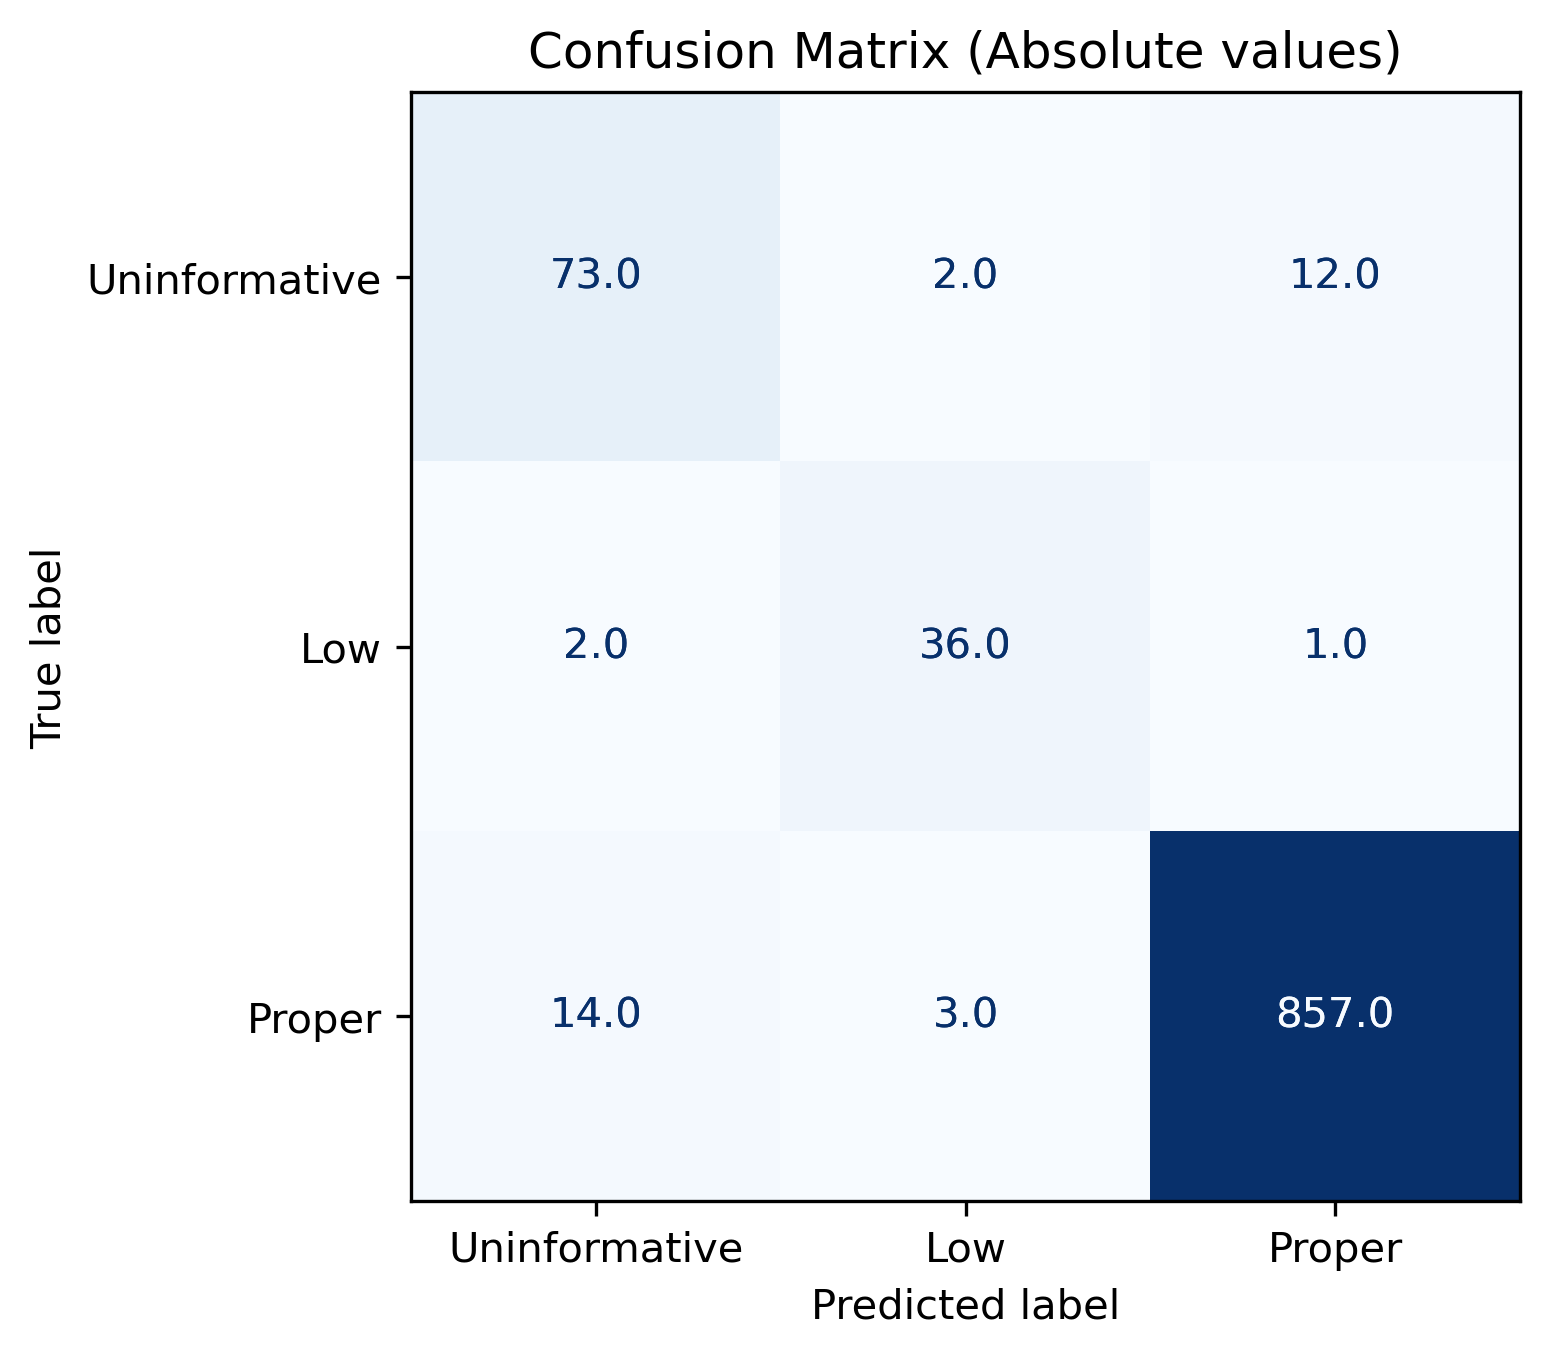
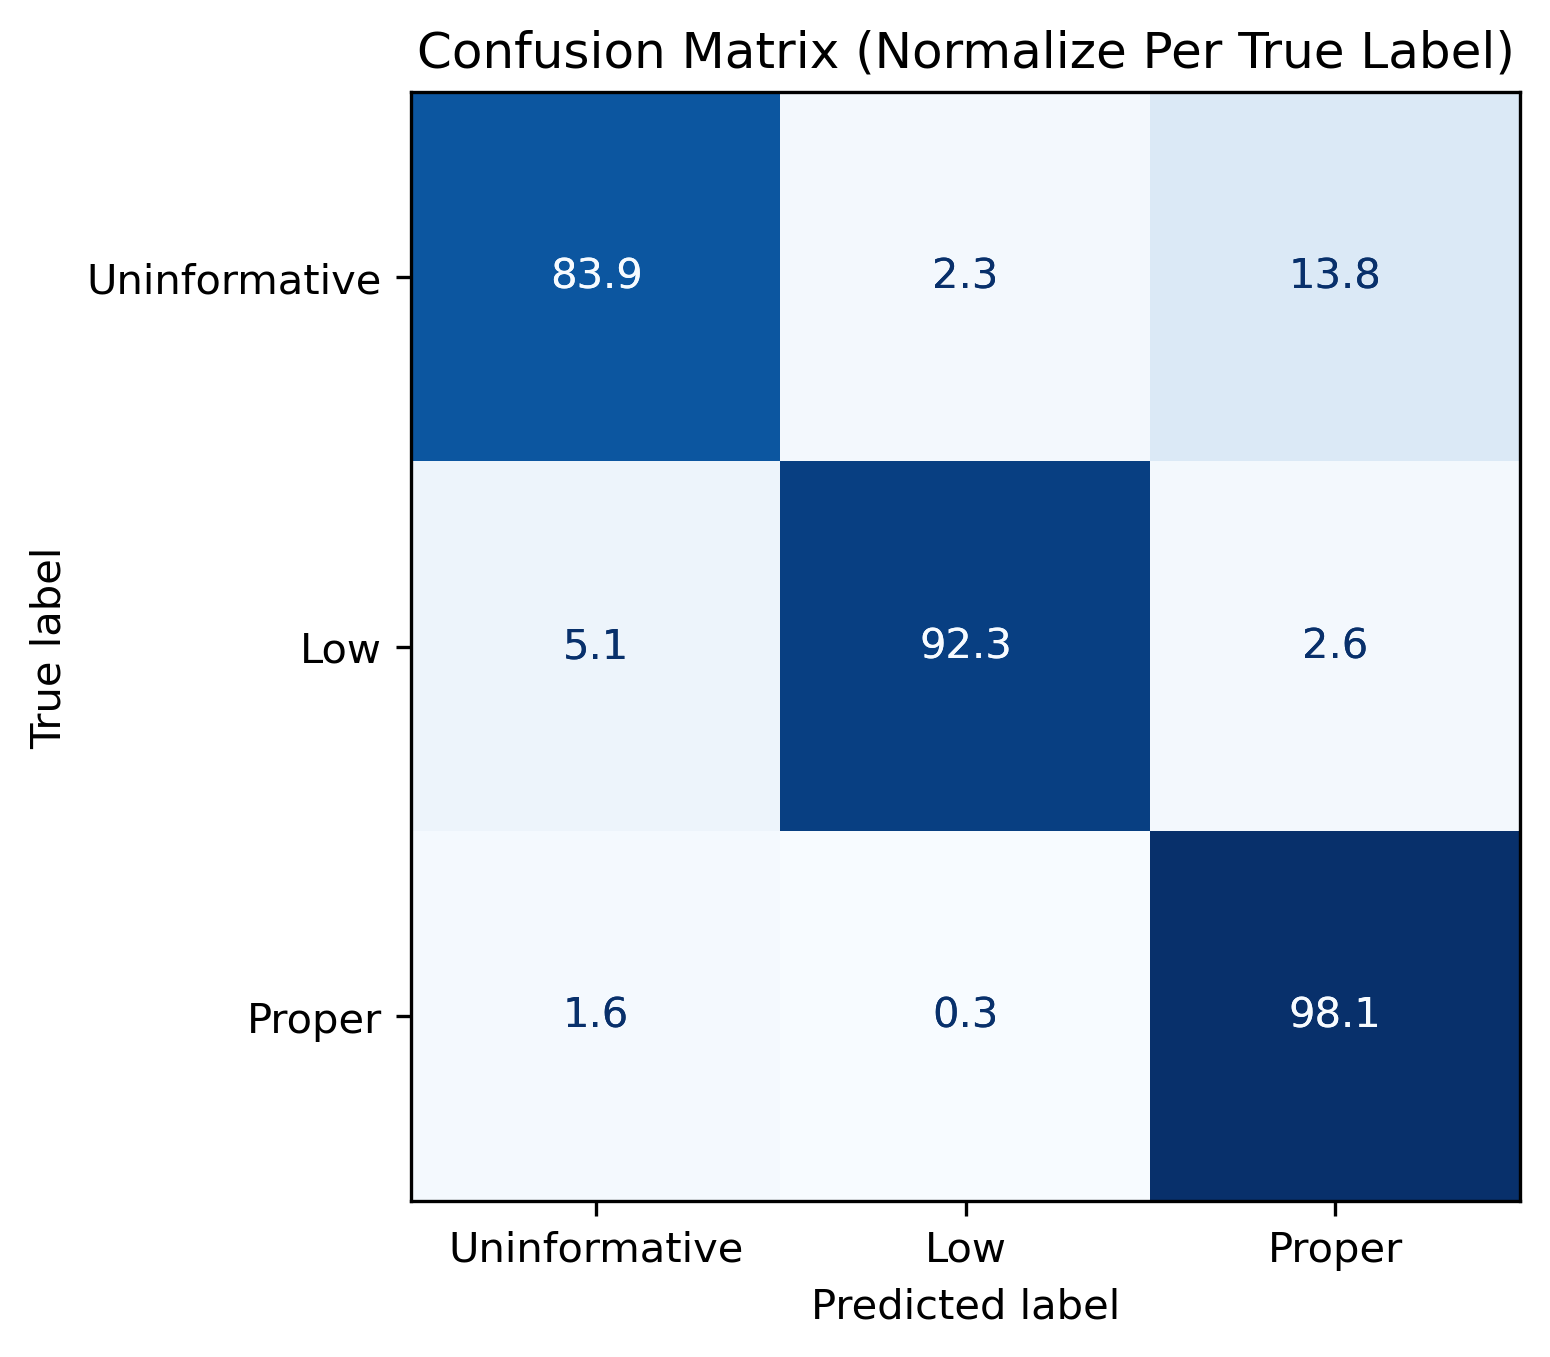

In [9]:
m = ModelEvaluator(embedder_m, dataloader.get_validation())
c_report = m.generate_report()
c_report.show_report()

In [6]:
c_report.show_misclassified_samples(true_label_to_filter=2)

,protein_annotation,true_label,predicted_label
34,Putative bacteriophage regulatory protein,2,0
64,Uncharacterized protein with gpF-like domain,2,0
65,Cocosin 1,2,0
85,Rnr22p,2,0
130,Bacteriophage resistance protein,2,0
131,Aste57867_24821 protein,2,0
190,Bro-N domain-containing protein 019R,2,0
232,WD40 repeat domain protein,2,1
375,Phage eae protein,2,0
376,Bacteriophage/transposase fusion protein,2,0


In [ ]:
# len(embedder_m._embed(["asd"][0]))

384

In [ ]:
# c_report.save_to_file("embbeder_report")